# Churn Prediction ISP-Phone providers


First and foremost import the regular overhead for data parsing, i.e pd, np and plt. Nothing too fancy, set desired plot style to "dark_background".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rc('font', size=16)

Read and load into a DataFrame object the csv containing the data (I've changed its name to dataset)

In [2]:
df = pd.read_csv("dataset.csv", index_col=0) #specified index column, otherwhise there will be duplicated indexes.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


There are a bunch of columns, I am not able to see them all just by inspecting the head or tail of the DataFrame. Define and Index object just for visualization purposes.

In [3]:
index = df.columns
index

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

It is evident that this is a dataset consisting of relevant information from customers regarding their ISP-Phone provider. I've got entries describing customer information, such as gender and seniority, as well as those columns related to the service itself, its cost and features. Now that I've seen the overhead it is time to get more information from the data itself, mostly <strong>non-Null count</strong> and <strong>dtype</strong>.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7042 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset consists on approximately 7000 data entries. There are a bunch of <strong>nan</strong> entries in the MultipleLines column. It is reasonable to wish (cross fingers) that this feature will not have too much impact in the predictive model, otherwhise, it will be neccesary to drop some entries or find an heuristic to fill this missing information without <i>hurting</i> the model.

## Segregating cathegorical and numeric features.

The following way of segregating numeric data from a pandas.DataFrame object is completely intuitive using python built-in <strong>set</strong> operations. Despite being readable, it is not recommended since cathegorical data could already be encoded, therefore this type of filtering becomes messy and unmanageable (if you want to automatize). Nontheless, there are 21 columns, this is completely manageable for yours truly.  

In [5]:
num_cols = list(df._get_numeric_data().columns)
cath_cols = list(set(index)-set(num_cols))

In [6]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges']

It is suspicious that SeniorCitizen cathegory is numeric, mostly sure is enocded as a numerical value. 

In [7]:
df['SeniorCitizen'].head()

0    0
1    0
2    0
3    0
4    0
Name: SeniorCitizen, dtype: int64

Indeed, those are encoded, so I'll update the cath_cols variable

In [8]:
num_cols.remove('SeniorCitizen')

In [9]:
for num in num_cols:
    print(num,df[num].iloc[0])

tenure 1.0
MonthlyCharges 29.85


Append the corresponding cathegorical boolean label.

In [10]:
cath_cols.append('SeniorCitizen')

In [11]:
cath_cols

['Partner',
 'DeviceProtection',
 'OnlineSecurity',
 'TotalCharges',
 'gender',
 'StreamingMovies',
 'TechSupport',
 'MultipleLines',
 'PaperlessBilling',
 'StreamingTV',
 'InternetService',
 'Contract',
 'Dependents',
 'customerID',
 'PhoneService',
 'OnlineBackup',
 'Churn',
 'PaymentMethod',
 'SeniorCitizen']

With the same level of distrust, I'll check the cathegorical columns in a rather nasty way, but the best I can do dealing with different encodings for boolean variables and (possibly) disguised numeric values as strings.

In [12]:
for cath in cath_cols:
    print(f"First value for {cath} : {df[cath].iloc[0]}")

First value for Partner : Yes
First value for DeviceProtection : No
First value for OnlineSecurity : No
First value for TotalCharges : 29.85
First value for gender : Female
First value for StreamingMovies : No
First value for TechSupport : No
First value for MultipleLines : No phone service
First value for PaperlessBilling : Yes
First value for StreamingTV : No
First value for InternetService : DSL
First value for Contract : Month-to-month
First value for Dependents : No
First value for customerID : 7590-VHVEG
First value for PhoneService : No
First value for OnlineBackup : Yes
First value for Churn : No
First value for PaymentMethod : Electronic check
First value for SeniorCitizen : 0


Therefore TotalCharges is as well misinterpreted.

In [13]:
cath_cols.remove('TotalCharges')

In [14]:
num_cols.append('TotalCharges')

In [15]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

## Handling missing data

Lets check for nan values in the whole set of columns. This was already done, without too much effort, lets check that again 

In [16]:
for idx in index:
    aux = df[idx].loc[pd.isna(df[idx]) == True]
    print(idx, aux.isnull().values.any(),sep=' : ')

customerID : False
gender : False
SeniorCitizen : False
Partner : False
Dependents : False
tenure : True
PhoneService : False
MultipleLines : True
InternetService : False
OnlineSecurity : False
OnlineBackup : False
DeviceProtection : False
TechSupport : False
StreamingTV : False
StreamingMovies : False
Contract : False
PaperlessBilling : False
PaymentMethod : False
MonthlyCharges : False
TotalCharges : True
Churn : False


There are many ways to handle missing data. One of them is filling the data entries with a 'missing' string (or whatever you want to write on them). Other approach would be to drop all rows with missing values. For numeric data, there are more heuristics that can be applied, such as filling it with the mean value, or the nearest one i.e. <strong>backfill</strong>. 

Before doing anything I will show again, with another fancy method chaining (many thanks pandas), the amount of missing values.

In [17]:
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 1
PhoneService           0
MultipleLines       1000
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           1
Churn                  0
dtype: int64

So again, nothing new under the sun, MultipleLines is the main source of non-information. Let's hope again that this is not relevant for the predictive model, otherwhise we got to live with the missing data, drop it, or find a way around it.

In the following cell I'll do two important things, first of all I'll deepcopy the <strong>old dataframe</strong>, that is the one with a bunch of missing values from MultipleLines feature. This is neccesary beacuse python does not implement default deep copy by value when variables are assigned, it manages all its instances as references (object references). Insdie a script, this may be acceptable, since you are coding (if you are not too messy) in a direct enunciative way. But IPython/Jupyter is a double edged sword, it gives you versatility in exchange of robustness against spaghetti code. This is a good practiced I've acquired after hours of chasing what I've thought was a huge bug, but resulted in just as lost/reassigned reference.

The second and last thing I'll do is comment out a line I will use in the future (uncomment and run all again). This line is self-explanatory, drop from square one 'MultipleLines' feature. After doing the whole analysis with the <strong>df.dropna()</strong>. This is not the nicest way of implementing a relevance check, but I guess is valid taking in account the magnitude of the problem at hand.

In [18]:
#the following line is equivalent to: 
#import copy
#old_df = copy.deepcopy(df)

old_df = df.copy(deep=True)
#Uncomment the following two lines and redo the whole analysis. 
#df = old_df.drop('MultipleLines', axis=1) 
#cath_cols.remove('MultipleLines')

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6041 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6041 non-null   object 
 1   gender            6041 non-null   object 
 2   SeniorCitizen     6041 non-null   int64  
 3   Partner           6041 non-null   object 
 4   Dependents        6041 non-null   object 
 5   tenure            6041 non-null   float64
 6   PhoneService      6041 non-null   object 
 7   MultipleLines     6041 non-null   object 
 8   InternetService   6041 non-null   object 
 9   OnlineSecurity    6041 non-null   object 
 10  OnlineBackup      6041 non-null   object 
 11  DeviceProtection  6041 non-null   object 
 12  TechSupport       6041 non-null   object 
 13  StreamingTV       6041 non-null   object 
 14  StreamingMovies   6041 non-null   object 
 15  Contract          6041 non-null   object 
 16  PaperlessBilling  6041 non-null   object 


Before doing a feature analysis it is neccesary (at least for me) checking on unique entries per feature, therefore:

In [19]:
for cath in cath_cols:
    print(f"{cath} column has unique values: {df[cath].unique()}")

Partner column has unique values: ['Yes' 'No']
DeviceProtection column has unique values: ['No' 'Yes' 'No internet service']
OnlineSecurity column has unique values: ['No' 'Yes' 'No internet service']
gender column has unique values: ['Female' 'Male']
StreamingMovies column has unique values: ['No' 'Yes' 'No internet service']
TechSupport column has unique values: ['No' 'Yes' 'No internet service']
MultipleLines column has unique values: ['No phone service' 'No' 'Yes']
PaperlessBilling column has unique values: ['Yes' 'No']
StreamingTV column has unique values: ['No' 'Yes' 'No internet service']
InternetService column has unique values: ['DSL' 'Fiber optic' 'No']
Contract column has unique values: ['Month-to-month' 'One year' 'Two year']
Dependents column has unique values: ['No' 'Yes']
customerID column has unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
PhoneService column has unique values: ['No' 'Yes']
OnlineBackup column has uniq

Well, there are a bunch of Boolean variables, and also some multi-label features. There are no ordinal labels for the categorical columns. And lastly there is a label that is repeated along many features, that is 'No internet service', this seems to be redundant considering that the dataset has an InternetService Boolean variable. I will keep this in mind after doing a feature and prediction analysis for the numerical columns.

Finally it will be important to do something in order to ease my mind, hunt witches i.e. check for repeated customers, just in case.  

In [20]:
df['customerID'].unique().shape[0] == df.shape[0]

True

Was I lucky?

In [21]:
old_df['customerID'].unique().shape[0] == old_df.shape[0]

True

No, it's all good, great. 

Judging from the ID there are no repeated customers in the dataset, no relevant information this feature could contribute so I'll drop it.

In [22]:
df = df.drop(['customerID'], axis=1)
cath_cols.remove('customerID')

I forgot about the encoding of TotalCharges all along, so next step is to filter out the data again from the empty entries present in the TotalCharges column.

In [23]:
print(df['TotalCharges'].dtype)
# df['TotalCharges'].to_numpy(dtype=np.float64) this line of code will prompt an error from missing data
df = df[(df['TotalCharges']!= '') & (df['TotalCharges'] != ' ') ]

object


In [24]:
df['TotalCharges'].shape[0]

6032

We lost 9 data entries from <strong>df</strong>, nothing to worry. Lets cast the data to np.float64 as it belongs to this realm

In [25]:
df['TotalCharges'] = df['TotalCharges'].astype(np.float64)
print(df['TotalCharges'].dtype)

float64


All set to start doing some visual exploration

# Visual Exploration

## Numerical columns

## Tenure

I will analyze the tendencies for the Churn Density per tenure amount (I must confess I did not know what tenure meant :P).

First of all I will segregate the customers per tenure amount, accounting for the unique tenure values that are present in the dataset. For each tenure value, I've calculated the mean population  that did churn (as well as the ones that did not, they are uniequivocally determined). Assuming a Binomial distribution, namely $X_t$  where the $t$ index represents the $t$-th unique tenure value, therefore the PMF $f(c_t, n_t, p_t)$ for a series of $c_t$ succeses (yes or no churn) in $n_t$ independent trials is given by:

$$
f(c_t, n_t, p_t) = \binom{n_t}{c_t} p_t^{c_t}(1-p_t)^{1-c_t}
$$

with mean equal to 

$$
\operatorname {E} [X_t]=n_tp_t
$$

and variance

$$
\operatorname {Var} [X_t] = n_tp_t(1-p_t) 
$$

since the random variable I'll manipulate down below is churn density, that is  

$$\frac{X_t}{n_t}$$

therefore I've got that 

$$
\operatorname {E} \left[\frac{X_t}{n_t}\right]=p_t \quad ; \quad \operatorname {Var} \left[\frac{X_t}{n_t}\right] = \frac{p_t(1-p_t)}{n_t}
$$

so the standard error for the $t$-th tenure is:

$$
\text{SE}_t=  \sqrt{\operatorname {Var} \left[\frac{c_t}{n_t}\right]} = \sqrt{\frac{p_t(1-p_t)}{n_t}}
$$


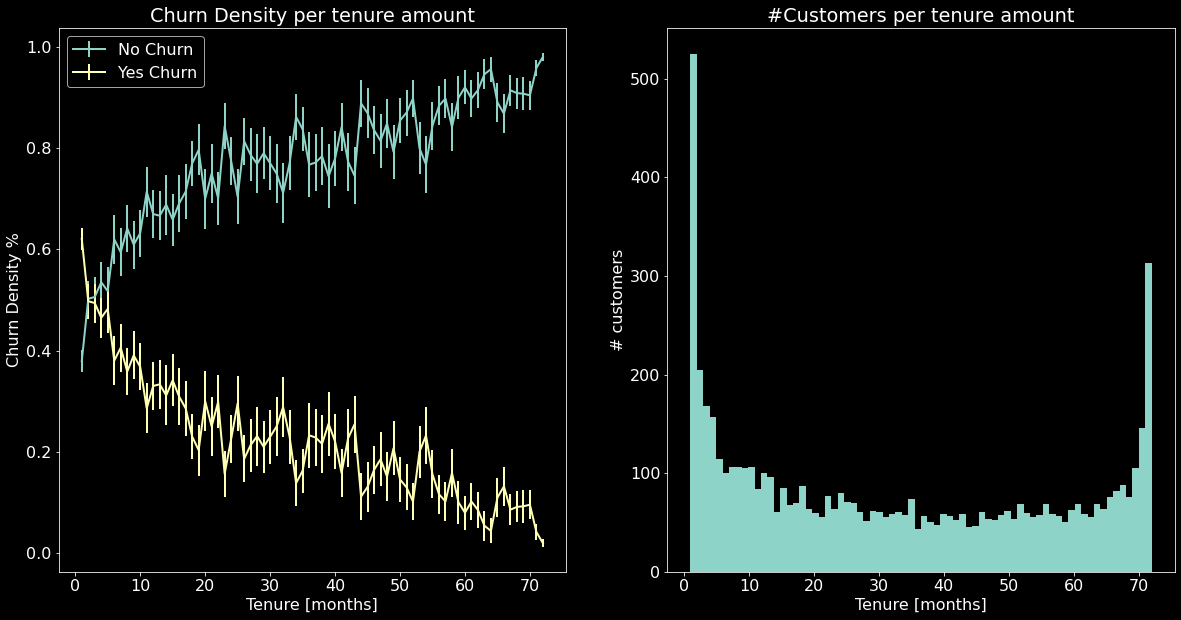

In [26]:
tenure = df['tenure'].to_numpy(dtype=np.float64) #cast to numpy array the tenure feature
unique_tenure = df['tenure'].unique() #obtain the unique tenures, months 
unique_tenure.sort() #sort them, increasing order
tenure_churn =  df['Churn'] #churn, tenure churn

#number of people per tenure amount, equivalent to "independent tests" 
tenure_sizes = np.array([tenure[tenure==u].shape[0] for u in unique_tenure])

#means

mean_no_churns = np.array([ tenure_churn.loc[(tenure == u) & (tenure_churn=='No')].shape[0]/size for u,size in zip(unique_tenure, tenure_sizes)])
mean_yes_churns = 1-mean_no_churns

#standard error
se = np.array([np.sqrt(p*(1-p)/n) for p,n in zip(mean_no_churns,tenure_sizes)])


#Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

#churn densities
errbar_no = ax[0].errorbar(unique_tenure, mean_no_churns, se, linewidth=2, label='No Churn')
errbar_yes = ax[0].errorbar(unique_tenure,mean_yes_churns, se, linewidth=2, label='Yes Churn')

title0 = ax[0].set_title('Churn Density per tenure amount')
ax[0].set_xlabel('Tenure [months]')
ax[0].set_ylabel("Churn Density %")
leg = ax[0].legend(loc=2)

#distribution of population per tenure amount
hist=ax[1].hist(tenure, bins=unique_tenure.shape[0])
ax[1].set_xlabel('Tenure [months]')
ax[1].set_ylabel('# customers')
title1 = ax[1].set_title('#Customers per tenure amount')


There is an apparent negative correlation between churn density and tenure. This is somewhat expected, because happy customers stay longer unless something too bad happens, nonetheless the churn density is nonzero even at high values of tenure. 

I've plotted the complementary churns, no new information from this dual errorbar plots, it just looked nice.

It is also significant that the standard error has an overall magnitude that is pretty similar to the amplitude of the "high frequency noise" present in the Churn density. I use quotes beacuse I don't possess the statistics jargon and I'm mostly based on my intuition. And that intuition tells me that if the variation in mean due to a "high frequency component" caused by finite data, is equivalent to the standar error estimator, I must be estimating the mean correctly, assuming a binomial distribution.

# Charges: Monthly and Total

Trying the same heuristic in order to explore the dependence on monthly charge. First of all check the amount of unique monthly charges, maybe similar payment plans are present among the customers. 

There are 1527 unique Monthly Charges


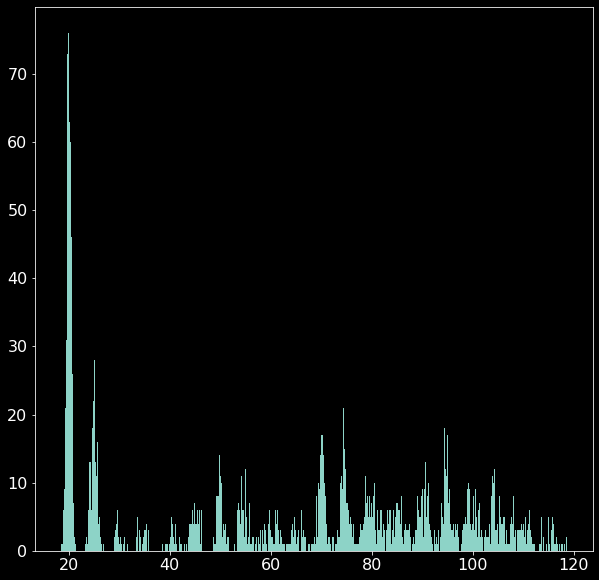

In [27]:
mc = df['MonthlyCharges'].to_numpy(dtype=np.float64)
unique_mc = df['MonthlyCharges'].unique()
print(f"There are {unique_mc.shape[0]} unique Monthly Charges")

fig = plt.figure(figsize=(10,10))
mc_hist = plt.hist(mc, bins=unique_mc.shape[0])

This first analysis does not shed light regarding churn rate, but it does say something, price ranges are distributed as a sum of normally distributed random variables representing price distribution.

I'm beyond good and evil so I would say two things:
<ul>
    <li>Since there are 1527 unique prices, if I try to replicate the analysis above this cells, I will have a great variance in mean prediction concerning Churn density (I've done it and it doesnt look good at all)</li>
    <li>Regarding the latter, a better heuristic would be to group by price ranges and try to find if there is correlation regarding Monthly Charges.</li>
</ul>

Firstly I am going to calculate the mean churn among all rows.

In [28]:
mc_churn = df['Churn'].to_numpy(dtype=str)

mc_churn_size = mc_churn.shape[0]
mc_yes_churn_size = mc_churn[mc_churn=='Yes'].shape[0]
mc_no_churn_size = mc_churn[mc_churn=='No'].shape[0]

mc_yes_rho = mc_yes_churn_size/mc_churn_size
mc_no_rho = 1 - mc_yes_rho

In [29]:
print(f"mean Yes churn density {mc_yes_rho:.3f}")

mean Yes churn density 0.265


In [30]:
print(f"mean No churn density {mc_no_rho:.3f}")

mean No churn density 0.735


The following cell contains the neccesary code to group by a fixed amount of Monthly Charges. After doing this, the latter analysis is replicated with the newly transformed data. 

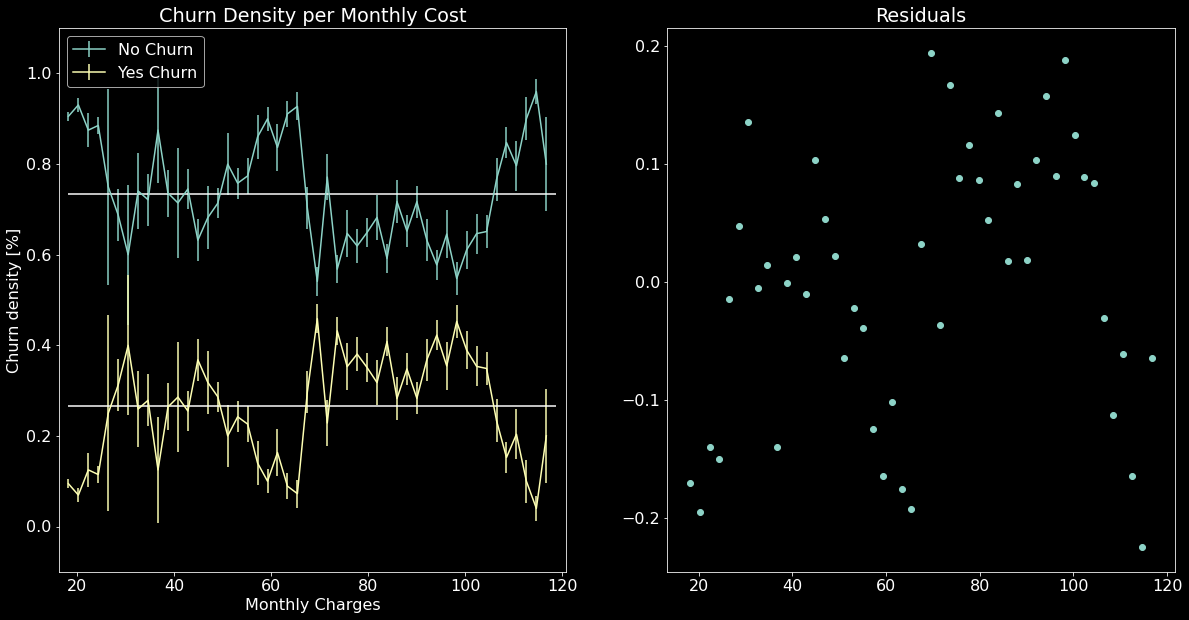

In [31]:
#set min and max values
min_mc = min(mc)
max_mc = max(mc)

#define desired Ranges
RANGES = 50

#build Monthly Charges ranges
mc_ranges = np.linspace(min_mc, max_mc, RANGES)
price_ranges = np.array([[mc_ranges[i],mc_ranges[i+1]] for i in range(len(mc_ranges)-1)])

#group by range
hist_mc_churns = [mc_churn[(mc<r[1]) & (mc>r[0])] for r in price_ranges]
shapes_mc_churns = np.array([m.shape[0] for m in hist_mc_churns])

#mean churn density per range
no_mc_churns = np.array([m[m=='No'].shape[0]/s if s != 0 else mc_no_rho for m,s in zip(hist_mc_churns,shapes_mc_churns)])
yes_mc_churns = 1 - no_mc_churns

#standard error
standard_errors = [np.sqrt(s*(1-s)/n) if n != 0 else 0 for s,n in zip(no_mc_churns,shapes_mc_churns)]

#Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax[0].set_xlim(min_mc-2,max_mc+2)
ax[0].set_ylim(-0.1,1.1)

eb_no = ax[0].errorbar(price_ranges[:,0], no_mc_churns, yerr=standard_errors, label="No Churn")
eb_yes = ax[0].errorbar(price_ranges[:,0], yes_mc_churns, yerr=standard_errors, label="Yes Churn")
hl_no = ax[0].hlines(mc_no_rho, min_mc, max_mc)
hl_yes = ax[0].hlines(mc_yes_rho, min_mc, max_mc)

ax[0].set_title('Churn Density per Monthly Cost')
ax[0].set_xlabel("Monthly Charges")
ax[0].set_ylabel("Churn density [%]")
ax[0].legend(loc=2)

scatter = ax[1].scatter(price_ranges[:,0], np.array([mc_no_rho for i in range(len(no_mc_churns))])-no_mc_churns)
title = ax[1].set_title('Residuals')

No apparent correlation. Residuals seem to be uniformly distributed around mean. If I group by clusters and redo the same analysis maybe more information will arise. From small number of Monthly Charges, there is an apparent increase in Yes Churn density. To help me with this pandas has a <strong>groupby</strong> method.

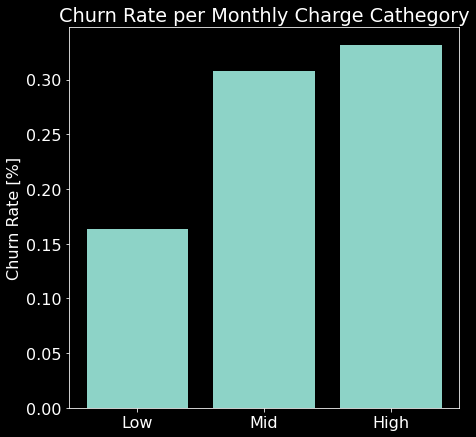

In [32]:
#copy, transform and cast
tmp_df = df.copy(deep=True)
tmp_df.loc[tmp_df.Churn=='No', 'Churn'] = 0.
tmp_df.loc[tmp_df.Churn =='Yes', 'Churn'] = 1.
tmp_df['Churn'] = tmp_df['Churn'].to_numpy(dtype=np.float64)

#ordinal labels for clustering numerical data
lmh_labels = ("Low", "Mid", "High")
bins = pd.cut(df["MonthlyCharges"], bins=3, labels=lmh_labels)
tmp_df['MonthlyCharges'] = bins
grouped_mc_means = tmp_df.groupby('MonthlyCharges').Churn.mean()

#Plot
fig = plt.figure(figsize=(7,7))
barplot = plt.bar(grouped_mc_means.index, grouped_mc_means)

title = plt.title("Churn Rate per Monthly Charge Cathegory")
ylabel = plt.ylabel("Churn Rate [%]")

There is an apparent difference between Churn rate and Monthly cost. Next step is to check Total Charges, I assume this numerical variable is just tenure multiplied by Monthly cost.  

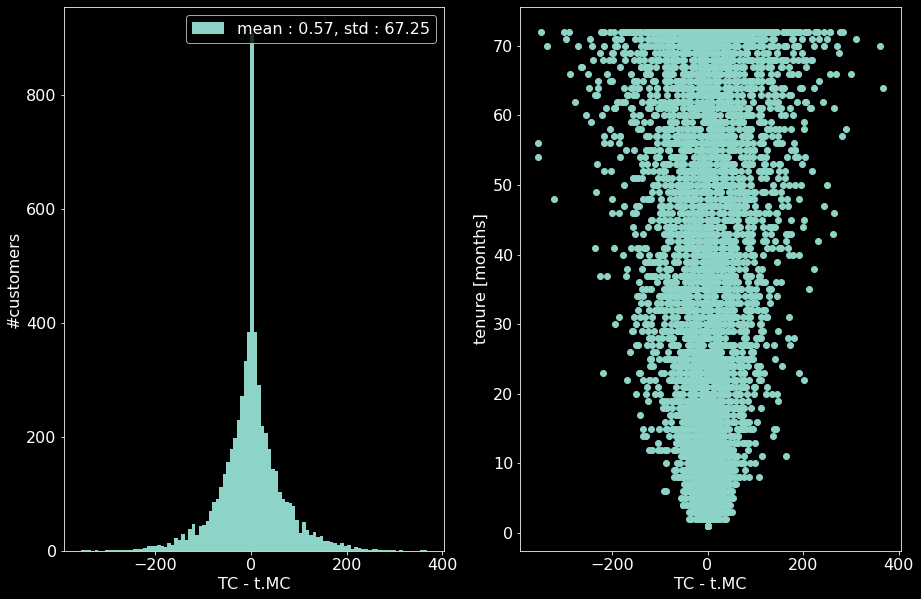

In [33]:
#Total Charges minus Tenure*MonthlyCharges
dif = df['TotalCharges']-df['MonthlyCharges']*df['tenure']

#Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

hist = ax[0].hist(dif, bins=100,label=f'mean : {dif.mean():.2f}, std : {dif.std():.2f}')
scatter = ax[1].scatter(dif,df['tenure'])

ax[0].set_xlabel('TC - t.MC')
ax[0].set_ylabel('#customers')
ax[1].set_xlabel('TC - t.MC')
ax[1].set_ylabel('tenure [months]')

leg = ax[0].legend(loc=1)

Well, the distribution of difference in charges is symmetric respect to 0. So it has mean zero (approximately) and standard deviation around 70. This implies that Total Charges feature will recover more or less the same correlation as tenure.

The fact that is symmetric implies that this deviation from the tenure correlation will be compensated. As we move towards higher amounts of tenure, it is intuitive that the charges difference increases (more room for change in prices, discounts, extra charges along the way, etc). This difference is centered as well in 0, so the "compensation" will take place accross tenure amounts as well.

Lastly it will be neccesary to asses this recovered dependence on TotalCharges and Churn rate.

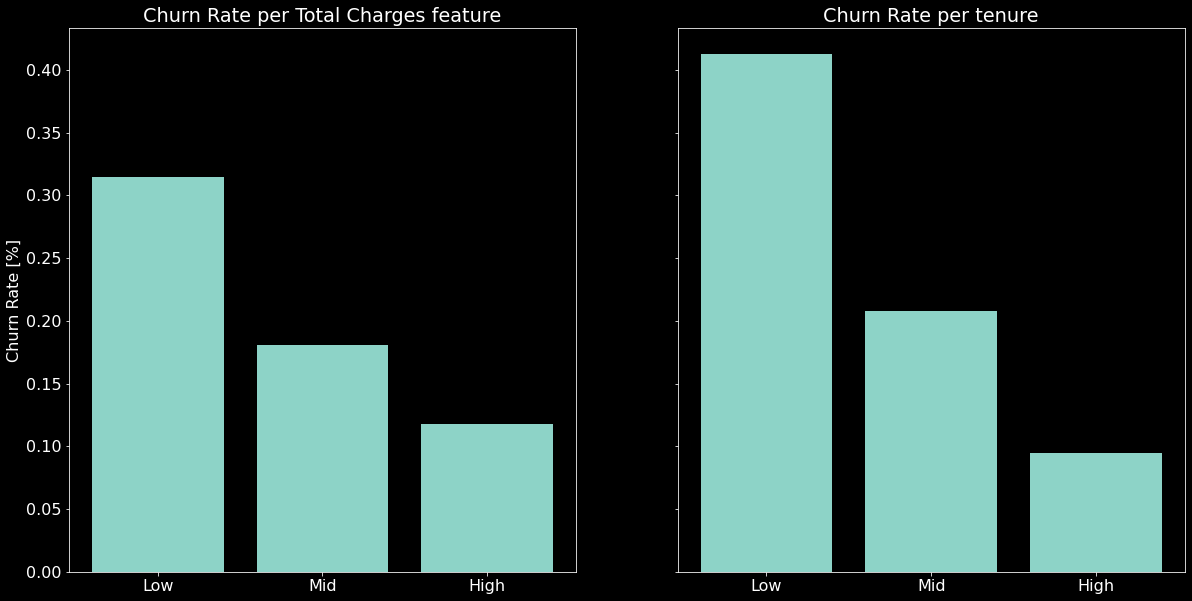

In [34]:
bins_tc = pd.cut(df["TotalCharges"], bins=3, labels=lmh_labels)
bins_tenure = pd.cut(df["tenure"], bins=3, labels=lmh_labels)
tmp_df['TotalCharges'] = bins_tc
tmp_df['tenure'] = bins_tenure

grouped_tc_means = tmp_df.groupby('TotalCharges').Churn.mean()
grouped_tenure_means = tmp_df.groupby('tenure').Churn.mean()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
barplot = ax[0].bar(lmh_labels, grouped_tc_means)
barplot = ax[1].bar(lmh_labels, grouped_tenure_means)

ax[0].set_title("Churn Rate per Total Charges feature")
ax[0].set_ylabel("Churn Rate [%]")

title = ax[1].set_title("Churn Rate per tenure")



The tendencies are both negative, the main differences take place at <strong>Low</strong>. In this group the churn rate differs the most from population mean. 

It is important to remember as well that despite the fact that the groups for both tenure and Total Charges are labeled as Low, Mid and High, they overlap due to independent clustering. So this must be regarded as a zero order analysis.

# Categorical 

In order to explore the categorical data I am going to replicate the analysis made above. In this case clustering is not neccesary, since categorical data is already labeled. The cell below will shed some light toward feature importance.

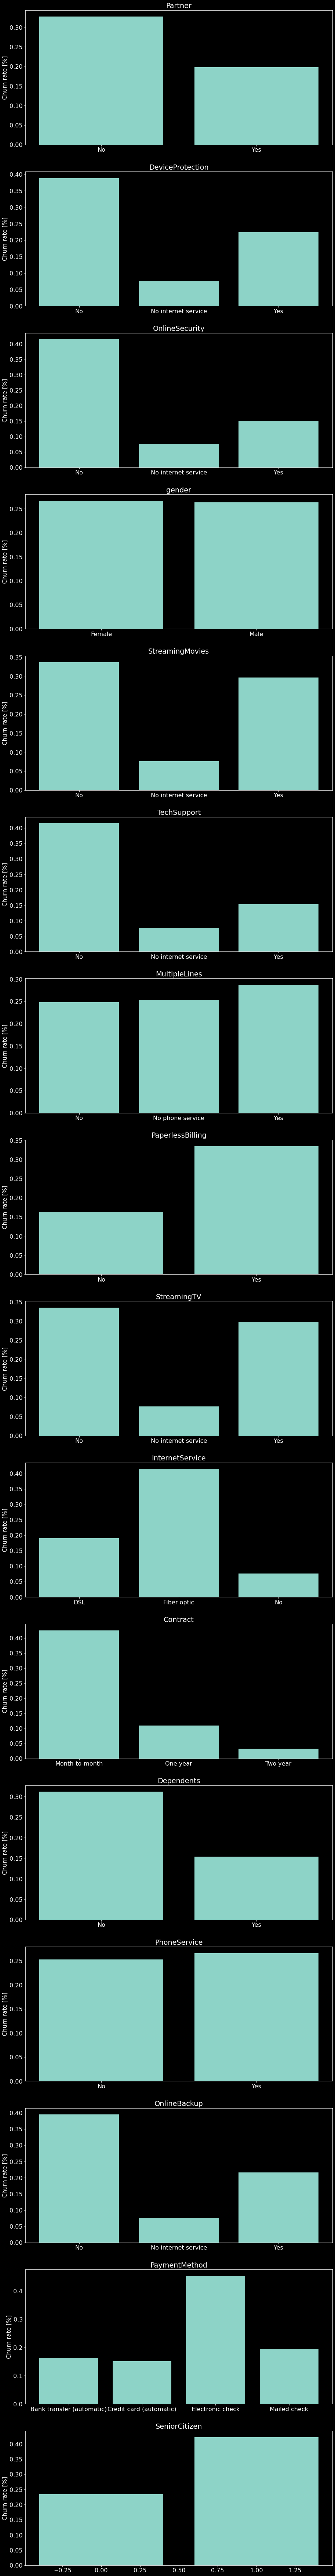

In [35]:
#usual overhead in order to avoid lost references
df_cath = df[cath_cols].copy(deep=True)
idx_cath = list(df_cath.columns)
idx_cath.remove('Churn')

#usual cast neccesary to do aggregation
df_cath.loc[df_cath.Churn=='No', 'Churn'] = 0.
df_cath.loc[df_cath.Churn =='Yes', 'Churn'] = 1.
df_cath['Churn'] = df_cath['Churn'].to_numpy(dtype=np.float64)

#N categorical data features
N = len(idx_cath)

#Plot
fig, ax = plt.subplots(nrows=N, ncols=1, figsize=(15,8*N))

for i,idx in enumerate(idx_cath):
    if idx == 'Churn':
        continue
    
    grouped_means = df_cath.groupby(idx).Churn.mean()
    ax[i].bar(grouped_means.index, grouped_means)
    ax[i].set_title(f'{idx}')
    ax[i].set_ylabel("Churn rate [%]")
    


Ok, gender, PhoneService, Multiple Lines are not relevant cathegories. The other categorical features show some interesting dependence with churn rate. 

First feature that caught my eye was Contract, it is evident that people dont want to churn if they are already up on rolling with their respective ISP. 

It seems curious that Internet Service, particulary Fiber Optic shows a higher churn rate. I've read that this may be related to high prices and competition, since FO is a more premium service. Seniority is surprising as well, the reason I would root for, is that they have more spare time to be picky. But maybe this is just correlated with, for example, senior citizens picking more expensive packages, such as those with Fiber Optic.

No online backup, online security, device protection or tech support show more churn rate. All this features are associated with quality products, and it seems more or less obvious that customers want to migrate to more secure and reliable services.

Finally Electronic Check shows a high churn rate, this may be caused by this non-automatic and maybe more time consuming payment method.

# Categorical analysis with Feature Engineering

The following analysis will try to establish an order of priority for the categorical variables, manipulating the labels to encode them in an useful way. Useful for the predictive model/s that will be generated.

Since all categorical variables are non-ordinal, dummy variable encoding will be used. Thank to <strong>pandas</strong> again, this gets done fairly easy. In order to avoid multicollinearity it is recommended that you encode k labels with k-1 dummy variables.

In [36]:
#usual overhead
df_cath = df[cath_cols].copy(deep=True)

#encode categorical data in dummy variables
df_cath_mod = pd.get_dummies(df_cath, columns=cath_cols, drop_first=True)

#set new index
idx_cath = df_cath_mod.columns

Now that labels are encoded as numerical values, I want to see the correlation matrix. It will most likely show some useful information.

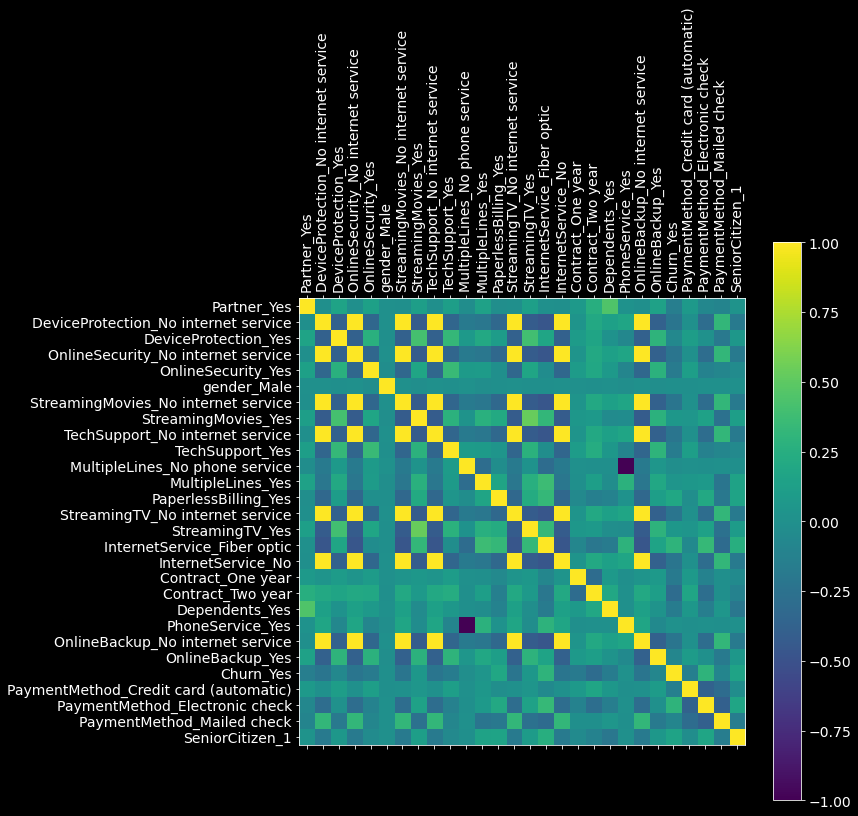

In [37]:
#Plot
f = plt.figure(figsize=(10, 10))
plt.matshow(df_cath_mod.corr(), fignum=f.number)
plt.xticks(range(df_cath_mod.select_dtypes(['number']).shape[1]), df_cath_mod.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_cath_mod.select_dtypes(['number']).shape[1]), df_cath_mod.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)


It is obvious that there are multiple perfectly correlated features (positive and negative). Mostly on 'No Internet Service' labels and 'No Phone Service' as well. This is caused by redundant information in features like Streaming movies, that contain this labels as unique values. This is all information that could be obtained just from the InternetService feature. Therefore, I am going to replace all redundant labels with 'No'.

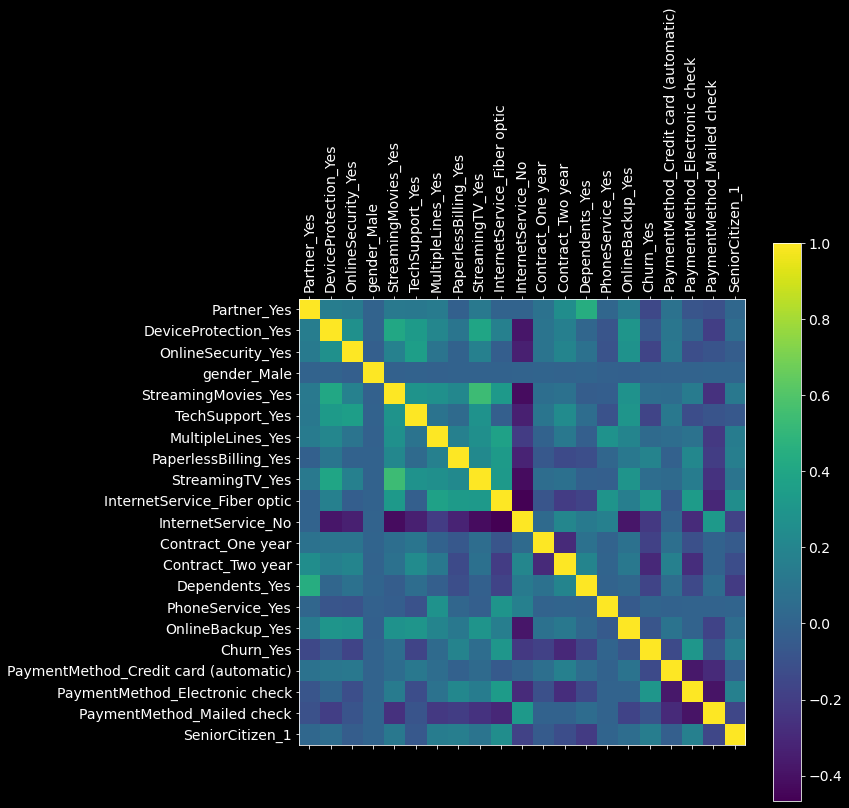

In [38]:
#usual overhead
df_cath = df[cath_cols].replace(to_replace=['No internet service', 'No phone service'],
                                value=['No','No']).copy(deep=True)

#encode new DataFrame categorical features.
df_cath_mod = pd.get_dummies(df_cath, columns=cath_cols, drop_first=True)

#Plot correlation matrix
f = plt.figure(figsize=(10, 10))
plt.matshow(df_cath_mod.corr(), fignum=f.number)
plt.xticks(range(df_cath_mod.select_dtypes(['number']).shape[1]), df_cath_mod.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_cath_mod.select_dtypes(['number']).shape[1]), df_cath_mod.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)


No redundant information, no more perfectly correlated data.

# Most important features

In the following cells, three different heuristic will be applied to select the most important features:

<ul>
    <li>Relative Difference in Mean</li>
    <li>Crammers V</li>
    <li>Pearson Correlation Coefficient</li>
</ul>

### <strong>Relative Difference in Mean</strong>

Considering the mean churn rate for the feature $f$ namely  

$$\operatorname {E}[C_f]$$

and the mean for the whole population Churn rate $C$ as 

$$\operatorname {E}[C]$$ 

the relative difference in mean is defined as 

$$
rmd = \frac{\operatorname {E}[C]-\operatorname {E}[C_f]}{\operatorname {E}[C]}
$$

the following cell calculates $rmf$ for each feature already encoded.

In [39]:
idx_cath_mod = [i for i in df_cath_mod.columns]
idx_cath_mod.remove('Churn_Yes')

In [40]:
rmd = []

for cath in idx_cath_mod:
    if cath == 'Churn_Yes' or cath == 'Churn_No':
        continue
        
    tmp_df = df_cath_mod[cath][df_cath_mod[cath]==1]
    
    nope_num = df_cath_mod['Churn_Yes'][(df_cath_mod['Churn_Yes']==0) & (tmp_df==1)].shape[0]
    total = tmp_df.shape[0]
    mean_no = nope_num/total
    
    rmd.append([cath, -(mean_no-mc_no_rho)/mc_no_rho])

rmd = np.array(rmd)
    #print(f" {cath} : mean Difference = {(mean_no-mc_no_rho)/mc_no_rho*100:.2f}%" )

### <strong>Cramers V Test</strong>

Searching towards a more appropiate way to determine feature importance related to churn, I've come accross the Cramers V Test on the Chi-Squared Statistics Wikipedia entry. This test is a measure of statistically difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table, just like Pearson's Chi-squared test.

" Cramér's V is a measure of association between two nominal variables (...) It is based on Pearson's chi-squared statistic" 
<a href="https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V"> <strong> Cramér's V</strong></a>

In the cell down below the test was implemented using scipy utilities for the $\chi^2$ statistic test, and implementing as well the Bias Corrected version.

In [41]:
import scipy.stats as ss

def cramers_corrected_stat(confusion_matrix):
    """ Calculate Cramers V statistic for categorial-categorial association.
        Bergsma, Wicher (2013). "A bias correction for Cramér's V and Tschuprow's T".
        Journal of the Korean Statistical Society. 42 (3): 323–328.
    """
    
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

idx_cramers = []
for idx in idx_cath_mod:
    contingency = pd.crosstab(df_cath_mod['Churn_Yes'],df_cath_mod[idx])
    idx_cramers.append([idx, cramers_corrected_stat(contingency)])

idx_cramers = np.array(idx_cramers)

### Pearson coefficient of correlation.

Thank to <strong>pandas</strong> again, calculating the pearson coefficient is fairly simple from the correlation matrix. In the cell below the pearsons coefficient are calculated based on just the Churn rate column. For each $F$ feature and churn rate $C$ 

$$
\displaystyle \rho _{F,C}={\frac {\operatorname {cov} (F,C)}{\sigma _{F}\sigma _{C}}}
$$

In [42]:
corr_churn = df_cath_mod.corr()['Churn_Yes']
corr_churn = corr_churn[corr_churn.index != 'Churn_Yes']
pearson = corr_churn.values

The following cell consists of a plot for each intercorrelation coefficient.  

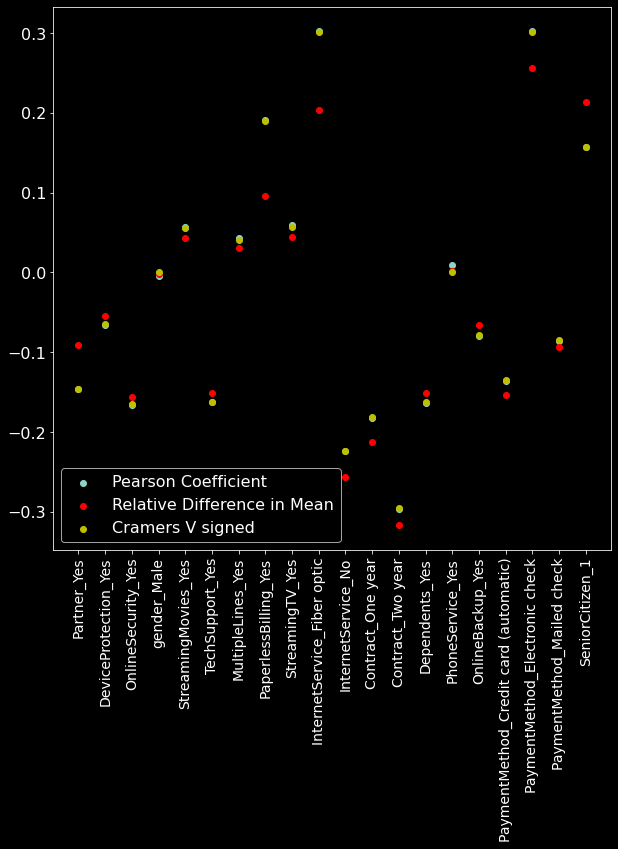

In [43]:
fig = plt.figure(figsize=(10,10))

alpha = 0.5
plt.scatter(corr_churn.index, pearson, label='Pearson Coefficient')
plt.scatter(rmd[:,0], np.float64(rmd[:,1]), c='r', label='Relative Difference in Mean')
plt.scatter(idx_cramers[:,0], np.float64(idx_cramers[:,1])*np.sign(corr_churn.values),
            c='y', label='Cramers V signed')

ticks = plt.xticks( fontsize=14, rotation=90)
leg = plt.legend(loc=3)

The overlap between feature importance heuristics is super apparent. I did not expect Relative Difference Mean to be such a good estimator of feature importance related to churn rate (considering CV and Pearson, as more correct ways of measuring dependence).

It is also crucial to understand that this is an order 0 analysis, it shows intercorrelation from sole features. It may be the case that two features must be combined in order to increase model accuracy. I guess this must be the case with features that have more than 2 unique labels.

# Predictive Model

I will test three different predictive models. A logistic Regression, a Decissions Tree Classifier and a Mulit Perceptron Layer classifier. From the analysis made above I am going to include just one numerical variable, 'tenure'. After making a comparaison between models, I will check the impact when MonthlyCharges and TotalCharges are included and normalized as well.

In [44]:
data = pd.concat([df_cath_mod,df['tenure']],axis=1)

Divide the data, independent and dependent, dummy + tenure and churn rate respectively.

In [45]:
import sklearn
from sklearn.model_selection import train_test_split

y_data = data['Churn_Yes']
x_data = data.drop('Churn_Yes', axis=1)

Generate the training and test sets. I'll use the default test_size as 30 percent of the whole dataset shape.

In [46]:
x_training, x_test, y_training, y_test = train_test_split(x_data, y_data, test_size = 0.3)

Useful imports toward reporting and summarizing model parameters.

In [47]:
from sklearn.metrics import classification_report

## <strong>Logistic Regression</strong>

In [48]:
from sklearn.linear_model import LogisticRegression
MAX_ITER = 10000

logit_model = LogisticRegression(solver='liblinear',
                                verbose=1,
                                max_iter=MAX_ITER)

logit = logit_model.fit(x_training, y_training)
logit_predictions = logit_model.predict(x_test)

print(classification_report(y_test, logit_predictions, digits=4))
logit_dict = classification_report(y_test, logit_predictions, output_dict=True)

[LibLinear]              precision    recall  f1-score   support

           0     0.8374    0.8918    0.8637      1322
           1     0.6443    0.5307    0.5820       488

    accuracy                         0.7945      1810
   macro avg     0.7408    0.7113    0.7229      1810
weighted avg     0.7853    0.7945    0.7878      1810



## <strong>Decissions Tree</strong> 

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf_entropy = DecisionTreeClassifier(criterion = "gini",
                                    random_state=100,
                                    max_depth=3,
                                    min_samples_leaf=59)
clf = clf_entropy.fit(x_training, y_training)
clf_predictions = clf_entropy.predict(x_test)

print(classification_report(y_test, clf_predictions, digits=4))
clf_dict = classification_report(y_test, clf_predictions, output_dict=True)

              precision    recall  f1-score   support

           0     0.8042    0.9259    0.8608      1322
           1     0.6597    0.3893    0.4897       488

    accuracy                         0.7812      1810
   macro avg     0.7320    0.6576    0.6752      1810
weighted avg     0.7653    0.7812    0.7607      1810



## <strong>Multi Layer Perceptron </strong>

In [50]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

mlp = MLPClassifier(hidden_layer_sizes=(10,8,8,10),
                    activation = 'identity',
                   solver = 'adam',
                   max_iter = MAX_ITER)
mlp = mlp.fit(x_training, y_training)

mlp_predictions = mlp.predict(x_test)

print(classification_report(y_test, mlp_predictions, digits=4))
mlp_dict = classification_report(y_test, mlp_predictions, output_dict=True)

              precision    recall  f1-score   support

           0     0.8421    0.8835    0.8623      1322
           1     0.6359    0.5512    0.5906       488

    accuracy                         0.7939      1810
   macro avg     0.7390    0.7174    0.7264      1810
weighted avg     0.7865    0.7939    0.7890      1810



In the next cell I am going to check feature importance both for the logit and decission trees classifiers. 

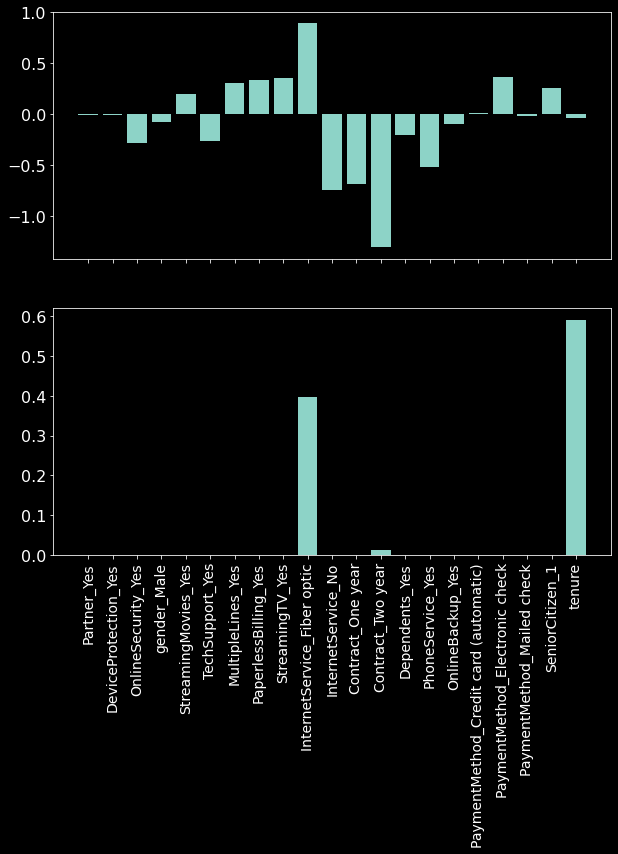

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True)

ticks = plt.xticks(fontsize=14, rotation=90)
columns = x_training.columns
fis = (logit.coef_[0], clf.feature_importances_) #feature importances

for i,fi in enumerate(fis):
    ax[i].bar(columns, fi)


It is noticeable that the dtCLF is not so robust on feature inclusion, it mostly depends on the presence of tenure, Internet Service and Contract. This is a heads up towards deciding which model to use.

The Multi Layer Perceptron does not have an intrinsic feature importance attribute, since it relies on co-adaptation of weights during the training phase.

## Precision, Accuracy, Recall/Sensitivity, Specificity or False Posite Rate?

In order to pick a model, I must select a metric, something to optimize. Regarding the problem at hand, I want to reduce the amount of customers that churn, first identifying them and after approaching them with love and offers (maybe). 

Therefore the metric I must be focusing on is Precission and Recall. If I'm the ISP, I would prefer false Positives rather than False Negatives. If a customer will not Churn, and I approach as if he/she would, the outcome will not be bad at all. Maybe some spend resources on telemarketing (or any anti-Churn strategy), not as bad as missing those who will in fact churn (False Negatives). 


That being said, I will continue to inspect feature importance, paying special attention to Precission 

$$
P = \frac{TP}{TP+FP}
$$

Recall or Sensitivity must be taken into account as well since this metric tells what percentage of users that end up churning does the model succesfully predict. Therefore

$$
R = \frac{TP}{TP+FN}
$$

These two metrics are inversely related. If I overpredict churn rate just to be cautious, recall will be exactly 1, but not all customers will churn, so the precission of my algorithm will not be as good. If I correctly predict that just one customer will churn I will have perfect precission but, the amount of False Negatives will be huge, therefore low Recall, and I will be missing a lot of churning customers.

From the analysis made above is apparent that Decissions Trees are not that good regarding metric.

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

The cell below uses sklearn metrics to obtain all these features for further analysis.

In [53]:
def confusion_analysis(test, pred_values):
    confusion = confusion_matrix(test, pred_values)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    sensitivity = TP / float(FN + TP)
    specificity = TN / (TN + FP)
    false_positive_rate = FP / float(TN + FP)
    precision = TP / float(TP + FP)
    
    return [sensitivity, specificity, false_positive_rate, precision]
    


## Permutations analysis, Comparaison between MLP and Logit

The following calculations try to establish again a measure of importance between features for both, Logistic Regression and Multi layer Perceptron models, already discarding DecisionsTrees.

I will shuffle feature columns, using <strong>numpy</strong> random permutations function. This will shed some light as well, regarding combined features. If a feature is shuffled and does not impact on performance (in a full featured model) this implies that the model itself does not care about specific combinations (is my intuition wrong?). 

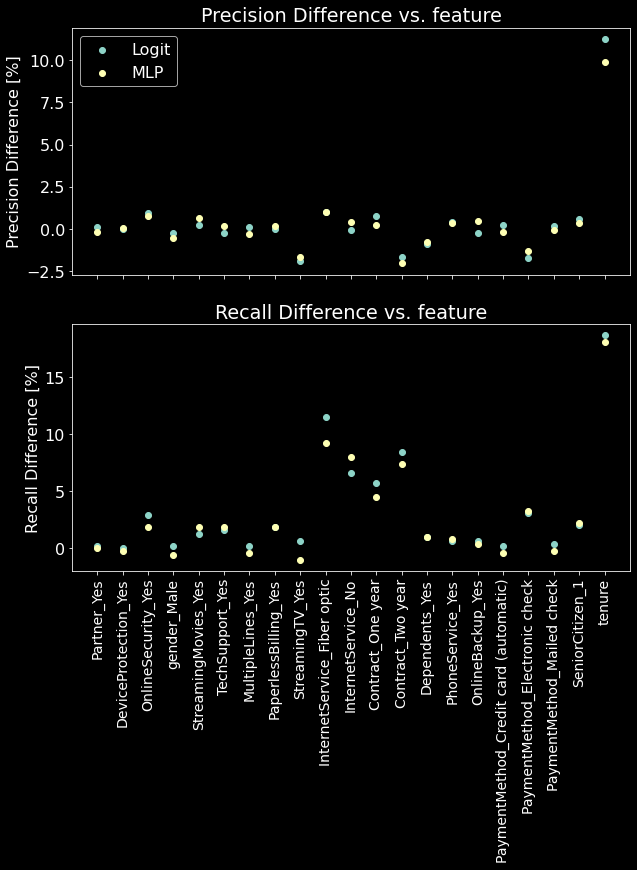

In [54]:
import copy

x_idx = x_test.columns

logit_p = []
mlp_p = []
logit_r = []
mlp_r = []

for idx in x_idx:
    tmp_x_test = copy.deepcopy(x_test)
    permuted = copy.deepcopy(np.random.permutation(tmp_x_test[idx].values))
    tmp_x_test[idx] = permuted
    
    tmp_logit_predictions = logit_model.predict(tmp_x_test)
    tmp_mlp_predictions = mlp.predict(tmp_x_test)
    
    tmp_logit_dict = classification_report(y_test, tmp_logit_predictions, output_dict=True)
    tmp_mlp_dict = classification_report(y_test, tmp_mlp_predictions, output_dict=True)

    logit_p.append(tmp_logit_dict['1']['precision'])     
    mlp_p.append(tmp_mlp_dict['1']['precision']) 
    logit_r.append(tmp_logit_dict['1']['recall'])     
    mlp_r.append(tmp_mlp_dict['1']['recall']) 
    

#cast
logit_p = np.array(logit_p)    
mlp_p = np.array(mlp_p)
logit_r = np.array(logit_r)    
mlp_r = np.array(mlp_r)

#Plot
fig, ax  = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True)
ax[0].scatter(x_idx, (logit_dict['1']['precision']-logit_p)*100, label='Logit')
ax[0].scatter(x_idx, (mlp_dict['1']['precision']-mlp_p)*100, label='MLP')
ax[1].scatter(x_idx, (logit_dict['1']['recall']-logit_r)*100, label='Logit')
ax[1].scatter(x_idx, (mlp_dict['1']['recall']-mlp_r)*100, label='MLP')


ax[0].set_title("Precision Difference vs. feature")
ax[0].set_ylabel("Precision Difference [%]")
ax[1].set_title("Recall Difference vs. feature")
ax[1].set_ylabel("Recall Difference [%]")

ax[0].legend(loc=2)
xticks = plt.xticks( fontsize=14, rotation=90)


The preceding analysis reassures that taking these two metrics, the feature importance is rather preserved (regarding previous feature importance analysis). Tenure, InternetService_Fiber_Optic, Contract_TwoYear, Contract_One_Year must not be shuffled. It was also obvious that gender did not imply anything on this analysis, the metrics reflect these characteristic. 

In order to establish a final ordering it will be useful to plot feature importance vs. feature watching the LogisticRegression model coefficients.

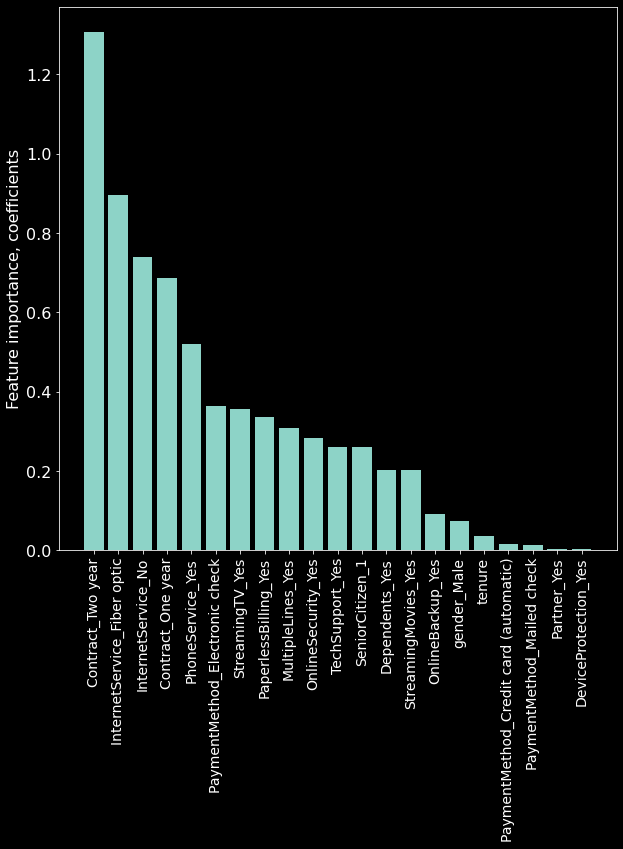

In [55]:
fig = plt.figure(figsize=(10,10))

sort_idx = np.abs(logit.coef_[0]).argsort()
column_sorted = x_training.columns[sort_idx[::-1]]
coef_sorted = (logit.coef_[0])[sort_idx[::-1]]

plt.bar(column_sorted, np.abs(coef_sorted))
plt.ylabel('Feature importance, coefficients')
ticks = plt.xticks(fontsize=14, rotation=90)

Tenure appears as not important since is not normalized. The next cell replicates the analysis normalizing the solely numerical column.

[LibLinear]              precision    recall  f1-score   support

           0     0.8528    0.8876    0.8699      1344
           1     0.6326    0.5579    0.5929       466

    accuracy                         0.8028      1810
   macro avg     0.7427    0.7228    0.7314      1810
weighted avg     0.7961    0.8028    0.7986      1810



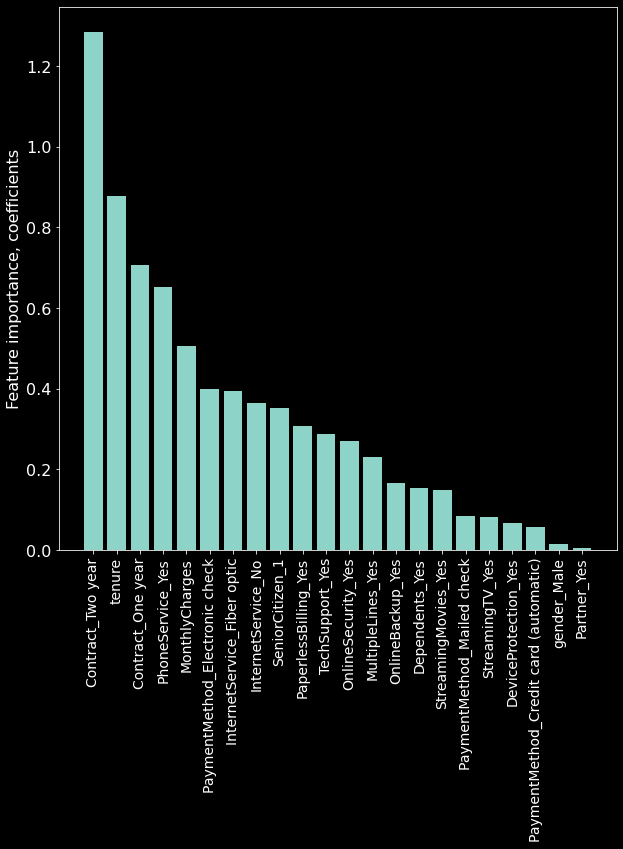

In [56]:
data_n = pd.concat([df_cath_mod,df['tenure']],axis=1)
data_n = pd.concat([df_cath_mod, df['tenure'], df['MonthlyCharges']], axis=1)
#data_n = pd.concat([data_n,df['TotalCharges']],axis=1)

data_n['tenure'] = (data_n['tenure']-data_n['tenure'].mean())/data_n['tenure'].std()
data_n['MonthlyCharges'] = (data_n['MonthlyCharges']-data_n['MonthlyCharges'].mean())/data_n['MonthlyCharges'].std()
#data_n['TotalCharges'] = (data_n['TotalCharges']-data_n['TotalCharges'].mean())/data_n['TotalCharges'].std()


y_data_n = data_n['Churn_Yes']
x_data_n = data_n.drop('Churn_Yes', axis=1)
x_training_n, x_test_n, y_training_n, y_test_n = train_test_split(x_data_n, y_data_n, test_size = 0.3)

logit_model_n = LogisticRegression(solver='liblinear',
                                verbose=1,
                                max_iter=MAX_ITER)

logit_n = logit_model_n.fit(x_training_n, y_training_n)
logit_predictions_n = logit_model_n.predict(x_test_n)

print(classification_report(y_test_n, logit_predictions_n, digits=4))
logit_dict_n = classification_report(y_test_n, logit_predictions_n, output_dict=True)


#Plot 
fig = plt.figure(figsize=(10,10))

sort_idx_n = np.abs(logit_n.coef_[0]).argsort()
column_sorted_n = x_training_n.columns[sort_idx_n[::-1]]
coef_sorted_n = (logit_n.coef_[0])[sort_idx_n[::-1]]

plt.bar(column_sorted_n, np.abs(coef_sorted_n))
plt.ylabel('Feature importance, coefficients')
ticks = plt.xticks(fontsize=14, rotation=90)

As expected, tenure is one of the most important features now (if feature importance is linear with the absolute value of the logit's coefficients). 

##  Filtering
From the previous analysis I've got a sort of intuiton, from three different test on importance of features. Multiple lines is not a good predictor and it was one of the main sources of nan values. There are not so many data entries, so I will redo the whole analysis dropping from square one this column (uncomment one line in one of the first cells and rerun the whole jupyter).

It will be useful to perform the analysisis above training the logistic model without some features. The following cell does just that, retrain and average the logistic regression model, and analyze the impact on performance (precision and recall) along feature inclusion.

In [57]:
column_sorted_n

Index(['Contract_Two year', 'tenure', 'Contract_One year', 'PhoneService_Yes',
       'MonthlyCharges', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No', 'SeniorCitizen_1',
       'PaperlessBilling_Yes', 'TechSupport_Yes', 'OnlineSecurity_Yes',
       'MultipleLines_Yes', 'OnlineBackup_Yes', 'Dependents_Yes',
       'StreamingMovies_Yes', 'PaymentMethod_Mailed check', 'StreamingTV_Yes',
       'DeviceProtection_Yes', 'PaymentMethod_Credit card (automatic)',
       'gender_Male', 'Partner_Yes'],
      dtype='object')

In [58]:
logit_p = []
logit_r = []

N_AVG = 100 #generate model statistic per feature included
DEF_N = 5

C_N = column_sorted_n.shape[0]
    
for i in range(DEF_N,C_N):
    
    N = i #columns to keep
    sorted_idx = column_sorted_n[::-1][:-N]
    
    #drop filtered columns
    df_filtered = data_n.copy(deep=True)
    df_filtered_mod = df_filtered.drop(sorted_idx, axis=1).copy(deep=True)
    
    #average precission and recall per feature included
    prec = 0
    recall = 0
    for j in range(N_AVG):
        #Filtered data
        f_y_data = df_filtered_mod['Churn_Yes']
        f_x_data = df_filtered_mod.drop('Churn_Yes', axis=1)

        #Create the train and test datasets
        f_x_training, f_x_test, f_y_training, f_y_test = train_test_split(f_x_data,
                                                                          f_y_data,
                                                                          test_size = 0.2)

        # Logistic Regression
        f_logit_model = LogisticRegression(solver='liblinear', max_iter=MAX_ITER)
        f_logit = f_logit_model.fit(f_x_training, f_y_training)
        f_logit_predictions = f_logit_model.predict(f_x_test)
        f_logit_dict = classification_report(f_y_test, f_logit_predictions, output_dict=True)
        
        prec += f_logit_dict['1']['precision']
        recall += f_logit_dict['1']['recall']
    
    logit_p.append(prec/N_AVG)
    logit_r.append(recall/N_AVG)
    
    print(f"{i+1} features out of {C_N} included in model ")

6 features out of 22 included in model 
7 features out of 22 included in model 
8 features out of 22 included in model 
9 features out of 22 included in model 
10 features out of 22 included in model 
11 features out of 22 included in model 
12 features out of 22 included in model 
13 features out of 22 included in model 
14 features out of 22 included in model 
15 features out of 22 included in model 
16 features out of 22 included in model 
17 features out of 22 included in model 
18 features out of 22 included in model 
19 features out of 22 included in model 
20 features out of 22 included in model 
21 features out of 22 included in model 
22 features out of 22 included in model 


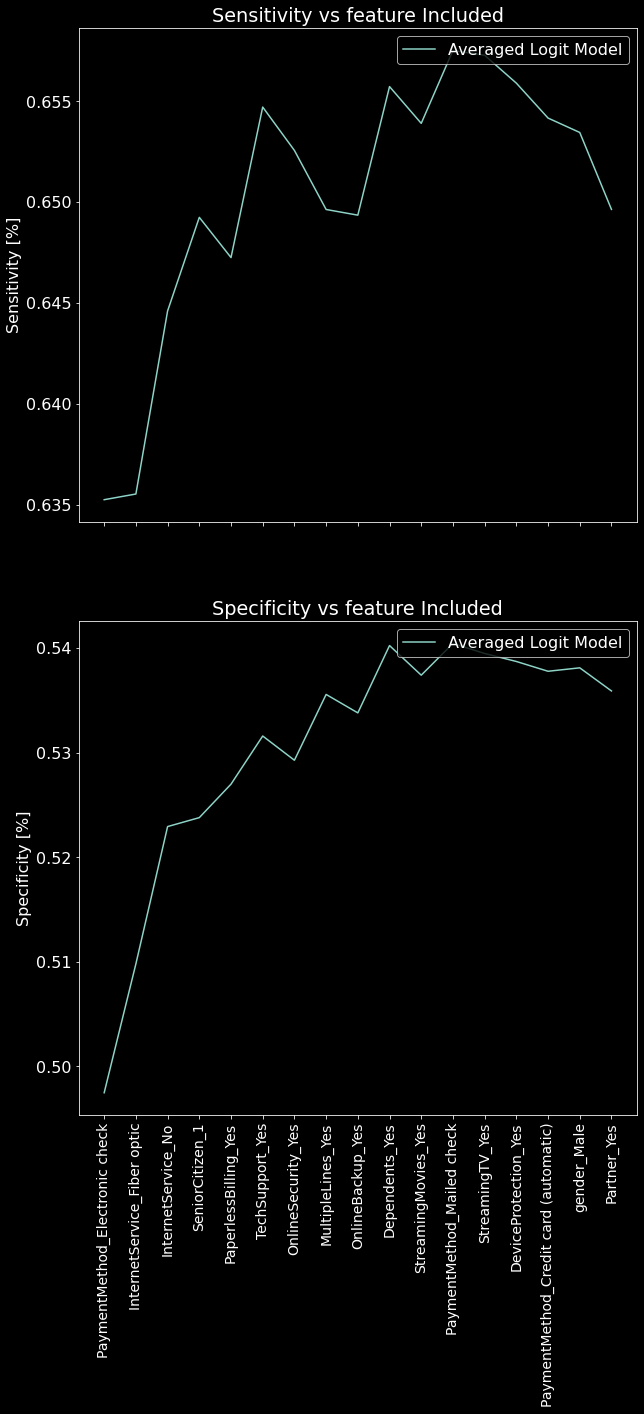

In [59]:
logit_p = np.array(logit_p)
logit_r = np.array(logit_r)
mlp_p = np.array(mlp_p)
mlp_r = np.array(mlp_r)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,20), sharex = True)
plt.xticks(fontsize=14, rotation=90)

ax[0].plot(column_sorted_n[DEF_N:], logit_p, label='Averaged Logit Model')

ax[0].set_ylabel("Sensitivity [%]")
ax[0].set_title("Sensitivity vs feature Included")

ax[1].plot(column_sorted_n[DEF_N:], logit_r, label='Averaged Logit Model')

ax[1].set_ylabel("Specificity [%]")
ax[1].set_title("Specificity vs feature Included")

leg0 = ax[0].legend(loc=1)
leg1 = ax[1].legend(loc=1)




There is a slight increase in recall maintaining precision pretty constant throughout the feature inclusion spectrum.

# Conclusions

A predictive model was built in order to diagnose churning customers from ISP data.

The dataset was manipulated and encoded in order to evaluate and extract feature importance. Numerical and categorical data was segregated and analyzed independently. 

The most important features were extracted, and their importance in a Binary Classifier (Logistic Regression model) has been assessed, before and after modelling, showing equivalent results, validating each other. The model in question was treated as a black box and no fine tuning was made for the hyperparameters. This is one of the reasons the MLP model was discarded, this is one big black box I don't want to play with ligthly, even though I understand the back-end principles regulating it's optimization problems. 

The LogisticRegression was picked due to the intrinisc tradeoff between metrics to measure success. Decision trees could achieve higher precision but very low recall. 

Further analysis could include, investigating and applying NN architectures already proven to be succesful to classify binary data.

All this work was done mainly with pandas and numpy for data manipulation, sklearn for modelling, and matplotlib.pyplot to make beautiful figures.
